## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import plotly.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
plt.style.use('ggplot')
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Load files

In [2]:
electric = pd.read_csv("Full Eletric Interval 042016.csv")

In [3]:
electric['Datetime'] = pd.to_datetime(electric['Date'] + ' ' + electric['Start Time'])

In [4]:
propertyCode = pd.read_excel("SIMS_Property_List_4-6-2016_Revised.xlsx")

In [5]:
weather = pd.read_csv('weather_prepared_final.csv')

In [6]:
weather.DATE = pd.to_datetime(weather.DATE)

### List of codes

In [7]:
codelist = [b[0] for b in electric['Meter'].str.split()]

In [8]:
codes = pd.Series(codelist)

### Usage by day

In [69]:
electric_date_full = electric.copy()
electric_date_full.Datetime = electric_date_full.Datetime.dt.date

In [70]:
electric_day = electric_date_full.drop('Temperature', 1).groupby(by=['Meter', 'Datetime']).sum()

### Temperature

In [11]:
temperature = weather.drop(['HUMIDITY', 'LON', 'LAT', 'STATION'], 1).iloc[1::4, :]

### Daily average temperature

In [12]:
daily_temperature = temperature
daily_temperature.DATE = temperature.DATE.dt.date
daily_temperature = daily_temperature.groupby(by='DATE').mean()

In [11]:
grouped = electric.groupby(by=['Meter', 'Date', 'Start Time']).sum()

## Box plots

In [63]:
def box_plots(meter):
    grouped_meter = grouped.ix[meter].drop('Temperature', 1).unstack(0)
    grouped_meter.columns = grouped_meter.columns.droplevel(0)
    grouped_meter.iplot(kind='box')

In [64]:
box_plots('A06 Crerar Library (B1)')

In [65]:
box_plots('H02 Law School (U1)')

## Box plots

In [107]:
def rolling_mean(meter):
    rolling_mean = electric[electric['Meter'].isin(['E44 Booth Harper Center (B3)'])].Usage.rolling(10).mean()
    rolling_mean.index = electric['Datetime'].unique()
    return rolling_mean

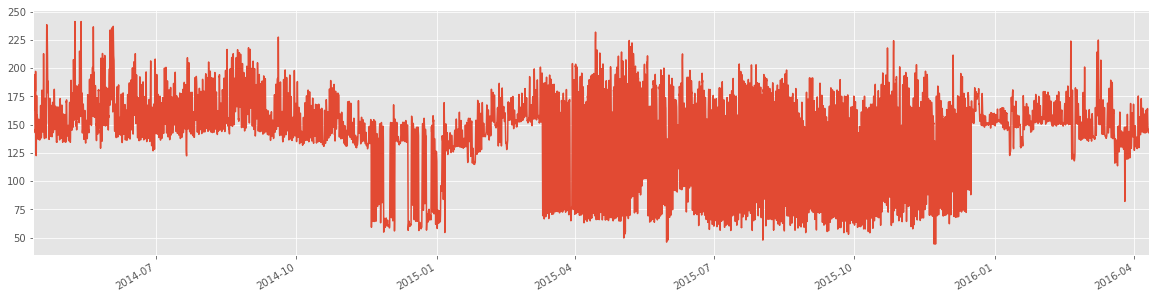

In [122]:
rolling_mean('E44 Booth Harper Center (B3)').plot(figsize=(20,5))

In [71]:
electric_day.ix['E44 Booth Harper Center (B3)'].iplot()

/usr/local/conda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix

